# Question:

Does the percent of total government spending on education have a direct correlation on the percent of total unemployment in the country?

# Hypothesis:

Countries that spend a greater percentage of their government spending on education will have lower unemployment because it makes it more likely that their society has more individuals with high level skills that are in demand.

### This is where I will import pandas as well as declare my named constants (% of government spending that goes to education and % of totalt unemployment in the country).

In [33]:
import pandas as pd
expenditure: str = "SE.XPD.TOTL.GB.ZS"
unemployment: str = "SL.UEM.TOTL.ZS"

### This is where I will read the csv file and assign it a simpler name to make the rest of the notebook easier to read and write

In [34]:
data = pd.read_csv("../../data/databank_education_2018.csv")

### This is where I will print my shape function to find the number of rows and columns of data that I will be analyzing. I will also use my head function to display the first 10 rows of data in the columns I am hoping to analyze

In [35]:
print(data[[expenditure, unemployment]].shape)
dataset = data[[expenditure, unemployment]]
dataset.head(10)

(244, 2)


,SE.XPD.TOTL.GB.ZS,SL.UEM.TOTL.ZS
0,NaN,11.060000
1,NaN,12.300000
2,NaN,11.890000
3,19.323059,NaN
4,NaN,7.000000
5,NaN,NaN
6,NaN,10.256798
7,NaN,9.220000
8,NaN,18.969999
9,NaN,NaN


### This is where I will be using column based selection to create a 3 column dataframe that includes the names of countries as well as the two indicator columns necessary for our analysis. I will use the head function along with this filtering to display the first 10 rows of this new dataframe

In [36]:
data[["Country", expenditure, unemployment]].head(10)

,Country,SE.XPD.TOTL.GB.ZS,SL.UEM.TOTL.ZS
0,Afghanistan,NaN,11.060000
1,Albania,NaN,12.300000
2,Algeria,NaN,11.890000
3,Andorra,19.323059,NaN
4,Angola,NaN,7.000000
5,Antigua and Barbuda,NaN,NaN
6,Arab World,NaN,10.256798
7,Argentina,NaN,9.220000
8,Armenia,NaN,18.969999
9,Aruba,NaN,NaN


### This is where I will create a clean data set by filtering out the rows that contain no data for either of the two columns I aim to analyze. I will also print the shape of the new data frame to see how much data there is as well as use the head function to look at the first 10 rows of data.

In [37]:
dataset = data[["Country", expenditure, unemployment]]
clean_data = dataset[data[expenditure].notna() & data[unemployment].notna()]
print(clean_data.shape)
clean_data.head(10)

(72, 3)


,Country,SE.XPD.TOTL.GB.ZS,SL.UEM.TOTL.ZS
12,Azerbaijan,7.435460,4.900000
19,Belize,21.365290,6.520000
20,Benin,17.709181,2.370000
22,Bhutan,22.766460,2.300000
30,Burkina Faso,22.661169,4.700000
31,Burundi,19.919870,1.450000
33,Cambodia,8.838980,0.130000
34,Cameroon,16.883160,3.360000
36,Caribbean small states,18.584000,8.743073
42,Colombia,15.982620,9.110000


### This is where I will organize my percent of government spending on education by descending order and then select the 10 highest values to identify the countries with the 10 highest rates of government spending on education

In [38]:
clean_data.sort_values(by = [expenditure], ascending = False).head(10)

,Country,SE.XPD.TOTL.GB.ZS,SL.UEM.TOTL.ZS
193,Sierra Leone,32.473221,4.42
46,Costa Rica,26.086670,9.63
84,Guatemala,23.749540,2.41
91,Honduras,22.954359,5.65
22,Bhutan,22.766460,2.30
30,Burkina Faso,22.661169,4.70
221,Togo,21.769091,3.66
190,Senegal,21.529409,6.53
19,Belize,21.365290,6.52
102,"Iran, Islamic Rep.",21.145679,12.06


### This is where I have imported numpy as well as matplot to help with the creation of the graphics. I used these functionalities to create a scatterplot of my data with the percent of government spending on education as the x-axis and the percent of unemployment as the y-axis. I also relabeled the x and y axes to make them more understandable as well as giving the scatterplot a title. I then added a regression line to the plot.

Text(0, 0.5, 'Unemployment rate')

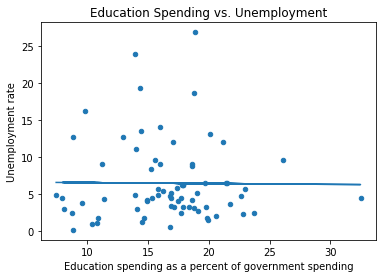

In [39]:
import numpy as np
import matplotlib.pyplot as plt

clean_data.plot.scatter(x = expenditure, y = unemployment)
x = clean_data[expenditure]
y = clean_data[unemployment]
coef = np.polyfit(x, y, 1)
func = np.poly1d(coef)
plt.plot(x, func(x))

plt.title("Education Spending vs. Unemployment")
plt.xlabel("Education spending as a percent of government spending")
plt.ylabel("Unemployment rate")



### This is where I will calculate the linear correlation between the amount of expenditure on education as a percent of government spending and the unemployment rate

In [40]:
clean_data[expenditure].corr(clean_data[unemployment])

-0.00984296176747086

# Conclusion:

The linear correlation shows that there is a weak negative correlation between expenditure on education as a percent of total government spending and the unemployment rate. Therefore we can conclude that there is very little relationship between the portion of total government spending that goes to education and the overall unemployment rate. What little correlation exists does indicate that my hypothesis was correct and that a higher portion of government spending going to education does decrease unemployment although the correlation is too weak for this to be a definitive statement.